In [1]:
import numpy as np
import pandas as pd
import imageio
import os
from sklearn.metrics import matthews_corrcoef
# import higra as hg

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cv2
import sys
sys.path.append('../../resuneta/src')

from bound_dist import get_boundary

# Test set metrics

In [3]:
# shared function(s)
def get_mask(extent, boundary_kernel_size=(2,2)):
    boundary = get_boundary(extent, kernel_size=boundary_kernel_size)
    mask = np.array((extent + boundary) >= 1, dtype=np.uint8)
    return mask

## Planet: consensus

In [4]:
def get_test_set_mcc(image_ids, pred_folder_name, 
                     label_folder_name='../data/planet/france/sherrie10k/extent_labels/1250px/2x-3x_downsample/',
                     threshold=0.5,
                     codes_to_keep=list(range(1,10)) + [11,14,15,16,17,18,19,21,24,25,26,28]):
    labels = []
    predictions = []

    for i, image_id in enumerate(image_ids):
        if i % 10 == 0:
            print(i)
        extent = imageio.imread(os.path.join(label_folder_name, image_id))
        extent = np.array(np.isin(extent, codes_to_keep), dtype=np.uint8)
        extent = extent[:256, :256]
        pred = np.load(os.path.join('../results/partial-france/', 
                                    pred_folder_name,
                                    'extent_predictions',
                                    '{}.npy'.format(image_id[:-4])))

        mask = get_mask(extent)
        mask_flat = mask.flatten()

        indices = np.where(mask_flat == 1)[0]
        extent_flat = extent.flatten()
        field_and_border = extent_flat[indices]

        pred_flat = pred.flatten()
        prediction = pred_flat[indices]
        prediction = np.array(prediction > threshold, dtype=np.uint8)

        labels = labels + list(field_and_border)
        predictions = predictions + list(prediction)
        
    return matthews_corrcoef(labels, predictions)

In [5]:
splits_df = pd.read_csv('../data/splits/sherrie10k_planetImagery_splits_20x20_4x-downsampled.csv')
splits_df['image_id'] = splits_df['image_id'].astype(str).str.zfill(5)
image_ids = splits_df[splits_df['fold'] == 'val']['image_id'].values
splits_df.head()

,image_id,lat,lon,fold
0,00000,45.170360,3.531187,test
1,00001,49.557181,0.591338,train
2,00002,46.215638,4.184958,test
3,00003,45.694366,1.540555,test
4,00004,44.683271,2.670917,train


In [10]:
# ==================== USER SETTINGS ==================== #
# trained on 3-month separate France 2x+3x downsampled
model_name = 'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759'
# ======================================================= #

base_dir = '../results/partial-france/{}'.format(model_name)
months = ['2019_04', '2019_07', '2019_10']

for subfolder in ['extent_predictions', 'boundary_predictions']:
    consensus_dir = os.path.join(base_dir, 'consensus_AprJulOct', subfolder)

    if not os.path.exists(consensus_dir):
        os.makedirs(consensus_dir)

    plot = False
    if plot:
        fig, ax = plt.subplots(4, 4, figsize=(16, 16))

    for downsample in ['2x', '3x']:
        for image_id in image_ids:
            
            exists = True
            pred = np.zeros((len(months), 256, 256))
            for m, month in enumerate(months):
                pred_path = '../results/partial-france/{}/{}/{}/{}-{}_{}.npy'.format(
                    model_name, month, subfolder, image_id, downsample, month)
                if os.path.exists(pred_path):
                    pred_month = np.load(pred_path)
                    pred[m] = pred_month

                    if plot:
                        r = m // 4
                        c = m % 4
                        ax[r,c].imshow(pred_month, cmap='Greys_r')
                else:
                    exists = False

            pred_consensus = np.mean(pred, axis=0)

            if plot:
                ax[-1,0].imshow(pred_consensus, cmap='Greys_r')
                plt.show()

            if exists:
                np.save(os.path.join(consensus_dir, image_id + '-' + downsample + '.npy'), pred_consensus)

## MCC for entire test set

#### Tune threshold on validation set

##### 3-month consensus

In [ ]:
image_ids = os.listdir('../data/planet/france/sherrie10k/extent_labels/1250px/2x-3x_downsample/')
test_images = splits_df[splits_df['fold'] == 'val']['image_id'].values
image_ids = [x for x in image_ids if x[:5] in test_images]

In [49]:
# 2x+3x downsampled
# using best thresh 0.58
mcc = get_test_set_mcc(
    image_ids,
    'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759/consensus_AprJulOct',
    label_folder_name='../data/planet/france/sherrie10k/extent_labels/1250px/2x-3x_downsample/',
    threshold=0.58
)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [50]:
mcc # 2x+3x = 0.6209741771485697

0.6209741771485697

In [38]:
# 2x+3x downsampled
mccs = []
threshs = np.linspace(0.5, 0.7, 11)
image_ids = os.listdir('../data/planet/france/sherrie10k/extent_labels/1250px/2x-3x_downsample/')
test_images = splits_df[splits_df['fold'] == 'test']['image_id'].values
image_ids = [x for x in image_ids if x[:5] in test_images]
for thresh in threshs:
    print(thresh)
    mcc = get_test_set_mcc(
        image_ids,
        'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759/consensus_AprJulOct',
        label_folder_name='../data/planet/france/sherrie10k/extent_labels/1250px/2x-3x_downsample/',
        threshold=thresh
    )
    mccs.append(mcc)

0.5
0.52
0.54
0.5599999999999999
0.58
0.6
0.62
0.64
0.6599999999999999
0.6799999999999999
0.7


In [40]:
np.array(threshs)[np.argmax(mccs)]

0.58

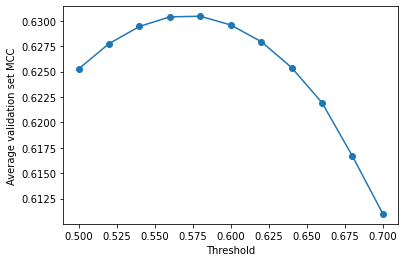

In [39]:
plt.plot(threshs, mccs, 'o-')
plt.xlabel('Threshold')
plt.ylabel('Average validation set MCC')
plt.show()

#### original resolution

In [11]:
# ==================== USER SETTINGS ==================== #
# trained on 3-month separate France original resolution
model_name = 'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_1x-downsampled_allfields_n6759'
splits_df = pd.read_csv('../data/splits/sherrie10k_planetImagery_splits_20x20_4x-downsampled.csv')
splits_df['image_id'] = splits_df['image_id'].astype(str).str.zfill(5)
fold = 'val'
# ======================================================= #

base_dir = '../results/partial-france/{}'.format(model_name)
months = ['2019_04', '2019_07', '2019_10']
image_ids = sorted(os.listdir('../data/planet/france/sherrie10k/extent_labels/300px/'))
test_images = splits_df[splits_df['fold'] == fold]['image_id'].values
image_ids = [x[:5] for x in image_ids if x[:5] in test_images]

for subfolder in ['extent_predictions', 'boundary_predictions']:
    consensus_dir = os.path.join(base_dir, 'consensus_AprJulOct', subfolder)

    if not os.path.exists(consensus_dir):
        os.makedirs(consensus_dir)

    plot = False
    if plot:
        fig, ax = plt.subplots(4, 4, figsize=(16, 16))

    for image_id in image_ids:
        exists = True
        pred = np.zeros((len(months), 256, 256))
        for m, month in enumerate(months):
            pred_path = '../results/partial-france/{}/{}/{}/{}_{}.npy'.format(
                model_name, month, subfolder, image_id, month)
            if os.path.exists(pred_path):
                pred_month = np.load(pred_path)
                pred[m] = pred_month

                if plot:
                    r = m // 4
                    c = m % 4
                    ax[r,c].imshow(pred_month, cmap='Greys_r')
            else:
                exists = False

        pred_consensus = np.mean(pred, axis=0)

        if plot:
            ax[-1,0].imshow(pred_consensus, cmap='Greys_r')
            plt.show()

        if exists:
            np.save(os.path.join(consensus_dir, image_id + '.npy'), pred_consensus)

In [88]:
# original resolution
mccs = []
threshs = np.linspace(0.5, 0.7, 11)
splits_df = pd.read_csv('../data/splits/sherrie10k_planetImagery_splits_20x20_4x-downsampled.csv')
splits_df['image_id'] = splits_df['image_id'].astype(str).str.zfill(5)
image_ids = sorted(os.listdir('../data/planet/france/sherrie10k/extent_labels/300px/'))
test_images = splits_df[splits_df['fold'] == 'test']['image_id'].values
image_ids = [x for x in image_ids if x[:5] in test_images][:100]
for thresh in threshs:
    print(thresh)
    mcc = get_test_set_mcc(
        image_ids,
        'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_1x-downsampled_allfields_n6759/consensus_AprJulOct',
        label_folder_name='../data/planet/france/sherrie10k/extent_labels/300px/',
        threshold=thresh
    )
    mccs.append(mcc)

0.5
0
10
20
30
40
50
60
70
80
90
0.52
0
10
20
30
40
50
60
70
80
90
0.54
0
10
20
30
40
50
60
70
80
90
0.5599999999999999
0
10
20
30
40
50
60
70
80
90
0.58
0
10
20
30
40
50
60
70
80
90
0.6
0
10
20
30
40
50
60
70
80
90
0.62
0
10
20
30
40
50
60
70
80
90
0.64
0
10
20
30
40
50
60
70
80
90
0.6599999999999999
0
10
20
30
40
50
60
70
80
90
0.6799999999999999
0
10
20
30
40
50
60
70
80
90
0.7
0
10
20
30
40
50
60
70
80
90


In [89]:
np.array(threshs)[np.argmax(mccs)]

0.5599999999999999

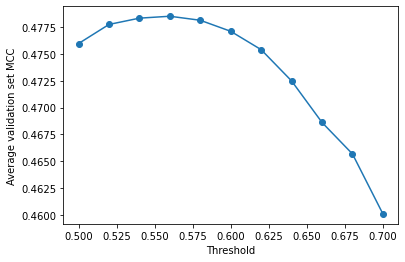

In [90]:
plt.plot(threshs, mccs, 'o-')
plt.xlabel('Threshold')
plt.ylabel('Average validation set MCC')
plt.show()

In [91]:
# original resolution
# using best thresh 0.56
mcc = get_test_set_mcc(
    image_ids,
    'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_1x-downsampled_allfields_n6759/consensus_AprJulOct',
    label_folder_name='../data/planet/france/sherrie10k/extent_labels/300px/',
    threshold=0.56
)

0
10
20
30
40
50
60
70
80
90


##### 3-month stack

In [210]:
# # trained on France 2x+3x downsampled stacked
# fold = 'test'
# image_ids = splits_df[splits_df['fold'] == fold]['image_id'].values
# mccs = []
# threshs = np.linspace(0.5, 0.7, 21)
# for thresh in threshs:
#     mcc = get_test_set_mcc(
#         'fractal-resunet_3month-stacked-shuffled_nfilter-32_depth-6_bs-6_lr-0.001_2x-3x-downsampled_fromscratch/',
#         fold=fold,
#         threshold=thresh
#     )
#     mccs.append(mcc)

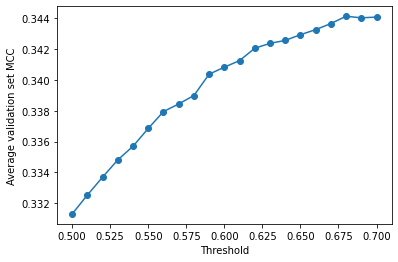

In [211]:
# plt.plot(threshs, mccs, 'o-')
# plt.xlabel('Threshold')
# plt.ylabel('Average validation set MCC')
# plt.show()
# # best threshold on test set = 
# # best MCC at best threshold = 

## Partial labels experiment

In [130]:
# ==================== USER SETTINGS ==================== #
# partial label experiments
model_name = 'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-4_lr-0.001_3x-downsampled_n5000_2field'
splits_df = pd.read_csv('../data/splits/sherrie10k_planetImagery_splits_20x20_2field.csv')
splits_df['image_id'] = splits_df['image_id'].astype(str).str.zfill(5)
label_dir = '../data/planet/france/sherrie10k/extent_labels/1250px/3x_downsample/'
# ======================================================= #

base_dir = '../results/partial-france/{}'.format(model_name)
months = ['2019_04', '2019_07', '2019_10']
test_ids = splits_df[splits_df['fold'] == 'test']['image_id'].values
label_ids = sorted(os.listdir(label_dir))
image_ids = [x[:5] for x in label_ids if x[:5] in test_ids]

for subfolder in ['extent_predictions', 'boundary_predictions']:
    consensus_dir = os.path.join(base_dir, 'consensus_AprJulOct', subfolder)

    if not os.path.exists(consensus_dir):
        os.makedirs(consensus_dir)

    plot = False
    if plot:
        fig, ax = plt.subplots(4, 4, figsize=(16, 16))

    for image_id in image_ids:

        exists = True
        pred = np.zeros((len(months), 256, 256))
        for m, month in enumerate(months):
            pred_path = '../results/partial-france/{}/{}/{}/{}_{}.npy'.format(
                model_name, month, subfolder, image_id, month)
            if os.path.exists(pred_path):
                pred_month = np.load(pred_path)
                pred[m] = pred_month

                if plot:
                    r = m // 4
                    c = m % 4
                    ax[r,c].imshow(pred_month, cmap='Greys_r')
            else:
                exists = False

        pred_consensus = np.mean(pred, axis=0)

        if plot:
            ax[-1,0].imshow(pred_consensus, cmap='Greys_r')
            plt.show()

        if exists:
            np.save(os.path.join(consensus_dir, image_id + '.npy'), pred_consensus)

In [131]:
# original resolution
mccs = []
threshs = np.linspace(0.4, 0.6, 11)
image_ids = sorted(os.listdir(label_dir))
test_images = splits_df[splits_df['fold'] == 'test']['image_id'].values
image_ids = [x for x in image_ids if x[:5] in test_images][:100]
for thresh in threshs:
    print(thresh)
    mcc = get_test_set_mcc(
        image_ids,
        '{}/consensus_AprJulOct'.format(model_name),
        label_folder_name=label_dir,
        threshold=thresh
    )
    mccs.append(mcc)

0.4
0
10
20
30
40
50
60
70
80
90
0.42000000000000004
0
10
20
30
40
50
60
70
80
90
0.44
0
10
20
30
40
50
60
70
80
90
0.46
0
10
20
30
40
50
60
70
80
90
0.48
0
10
20
30
40
50
60
70
80
90
0.5
0
10
20
30
40
50
60
70
80
90
0.52
0
10
20
30
40
50
60
70
80
90
0.54
0
10
20
30
40
50
60
70
80
90
0.56
0
10
20
30
40
50
60
70
80
90
0.58
0
10
20
30
40
50
60
70
80
90
0.6
0
10
20
30
40
50
60
70
80
90


In [132]:
np.array(threshs)[np.argmax(mccs)]
# 125/80 = 0.58
# 200/50 = 0.58
# 500/20 = 0.49
# 1000/10 = 0.54
# 2000/5 = 0.50
# 5000/2 = 0.52

0.52

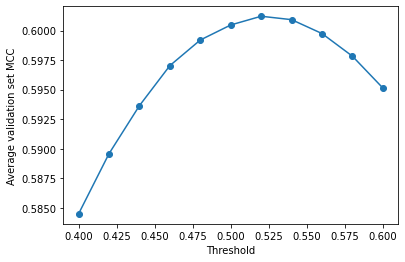

In [133]:
plt.plot(threshs, mccs, 'o-')
plt.xlabel('Threshold')
plt.ylabel('Average validation set MCC')
plt.show()

In [137]:
model_name = 'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-4_lr-0.001_3x-downsampled_n125_80field'
splits_df = pd.read_csv('../data/splits/sherrie10k_planetImagery_splits_20x20_2field.csv')
splits_df['image_id'] = splits_df['image_id'].astype(str).str.zfill(5)
label_dir = '../data/planet/france/sherrie10k/extent_labels/1250px/3x_downsample/'

In [140]:
# partial label experiment
# using best thresh
mcc = get_test_set_mcc(
    image_ids,
    '{}/consensus_AprJulOct'.format(model_name),
    label_folder_name=label_dir,
    threshold=0.58
)

0
10
20
30
40
50
60
70
80
90


In [141]:
mcc
# n_images = 125, n_fields = 80 : 0.5634685461286871
# n_images = 200, n_fields = 50 : 0.5854320741666292
# n_images = 500, n_fields = 20 : 0.5963263138549871
# n_images = 1000, n_fields = 10 : 0.5972832306102478
# n_images = 2000, n_fields = 5 : 0.6010938951411334
# n_images = 5000, n_fields = 2 : 0.6012103295816783

0.5634685461286871

## MCC at image level

In [63]:
def get_image_mccs(pred_folder_name, threshold=0.5):

    image_mccs = []
    mean_field_sizes = []

    for image_id in image_ids:
        extent = imageio.imread('../data/planet/india/GeneralBlockchain/extent_labels_test/{}.png'.format(image_id))
        pred = np.load(os.path.join('../results/india/GeneralBlockchain/', 
                                    pred_folder_name,
                                    'extent_predictions',
                                    '{}.npy'.format(image_id)))

        mask = get_mask(extent)
        mask_flat = mask.flatten()

        indices = np.where(mask_flat == 1)[0]
        extent_flat = extent.flatten()
        field_and_border = extent_flat[indices]

        pred_flat = pred.flatten()
        prediction = pred_flat[indices]
        prediction = np.array(prediction > threshold, dtype=np.uint8)

        mcc = matthews_corrcoef(field_and_border, prediction)
        image_mccs.append(mcc)

        n_components, numbered = cv2.connectedComponents(extent)
        field_sizes = []
        for i in range(1, n_components):
            one_field = np.array(numbered == i, dtype=np.uint8)
            field_sizes.append(np.sum(one_field))
        mean_field_size = np.mean(field_sizes)
        mean_field_sizes.append(mean_field_size)
        
    return image_mccs, mean_field_sizes

In [102]:
# trained on France 2x+3x downsampled separately, finetuned on 12-month India separately
image_mccs, mean_field_sizes = get_image_mccs(
    'fractal-resunet_12month-separate_nfilter-32_bs-8_lr-0.001_2x-3x_downsampled_finetuned/consensus')

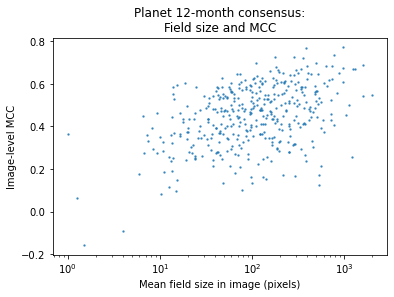

In [105]:
plt.scatter(mean_field_sizes, image_mccs, s=2, alpha=0.7)
plt.xscale('log')
plt.xlabel('Mean field size in image (pixels)')
plt.ylabel('Image-level MCC')
plt.title('Planet 12-month consensus:\nField size and MCC')
plt.show()

In [108]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression().fit(np.expand_dims(np.log(np.array(mean_field_sizes)), -1), 
                             np.expand_dims(np.array(image_mccs), -1))
print(reg2.score(np.expand_dims(np.log(np.array(mean_field_sizes)), -1), 
                np.expand_dims(np.array(image_mccs), -1)))
print(reg2.coef_)
print(reg2.intercept_)

0.1849934382545244
[[0.04997062]]
[0.21707524]


## MCC at field level

### Planet consensus

In [71]:
# pred_folder_name = 'fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759/consensus'
pred_folder_name = 'fractal-resunet_12month-separate_nfilter-32_bs-8_lr-0.001_2x-3x_downsampled_finetuned/consensus'

field_mccs = []
field_sizes = []

for image_id in image_ids:
    extent = imageio.imread('../data/planet/india/GeneralBlockchain/extent_labels_test/{}.png'.format(image_id))
    pred = np.load(os.path.join('../results/india/GeneralBlockchain/', 
                                pred_folder_name,
                                'extent_predictions',
                                '{}.npy'.format(image_id)))
    n_components, numbered = cv2.connectedComponents(extent)
    for i in range(1, n_components):
        one_field = np.array(numbered == i, dtype=np.uint8)
        one_field_flat = one_field.flatten()

        mask = get_mask(one_field)
        mask_flat = mask.flatten()

        indices = np.where(mask_flat == 1)[0]
        field_and_border = one_field_flat[indices]

        pred_flat = pred.flatten()
        prediction = pred_flat[indices]
        prediction = np.array(prediction > 0.5, dtype=np.uint8)

        mcc = matthews_corrcoef(field_and_border, prediction)
        field_mccs.append(mcc)

        size = np.sum(one_field)
        field_sizes.append(size)

/home/swang222/anaconda3/envs/mxnet1.6.0/lib/python3.6/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


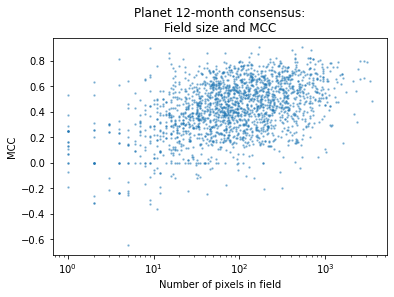

In [76]:
plt.scatter(field_sizes, field_mccs, s=2, alpha=0.4)
plt.xscale('log')
plt.xlabel('Number of pixels in field')
plt.ylabel('MCC')
plt.title('Planet 12-month consensus:\nField size and MCC')
plt.show()

In [111]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.expand_dims(np.log(np.array(field_sizes)), -1), 
                             np.expand_dims(np.array(field_mccs), -1))
print(reg.score(np.expand_dims(np.log(np.array(field_sizes)), -1), 
                np.expand_dims(np.array(field_mccs), -1)))
print(reg.coef_)
print(reg.intercept_)

0.17995360285787
[[0.06546948]]
[0.13540835]


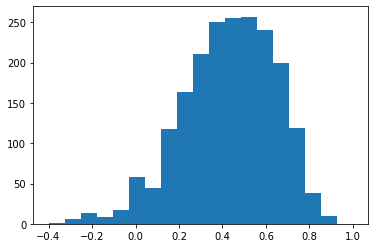

In [72]:
plt.hist(field_mccs, bins=np.linspace(-0.4, 1.0, 20))
plt.show()

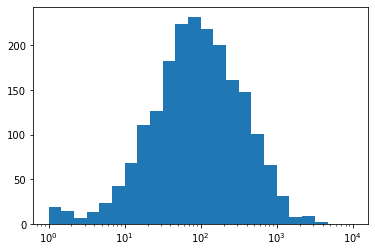

In [73]:
plt.hist(field_sizes, bins=np.logspace(0, 4, 25))
plt.xscale('log')
plt.show()

## IoU at field level

In [2]:
def InstSegm(extent, boundary, t_ext=0.4, t_bound=0.2):
    """
    INPUTS:
    extent : extent prediction
    boundary : boundary prediction
    t_ext : threshold for extent
    t_bound : threshold for boundary
    OUTPUT:
    instances
    """

    # Threshold extent mask
    ext_binary = np.uint8(extent >= t_ext)

    # Artificially create strong boundaries for
    # pixels with non-field labels
    input_hws = np.copy(boundary)
    input_hws[ext_binary == 0] = 1

    # Create the directed graph
    size = input_hws.shape[:2]
    graph = hg.get_8_adjacency_graph(size)
    edge_weights = hg.weight_graph(
        graph,
        input_hws,
        hg.WeightFunction.mean
    )

    tree, altitudes = hg.watershed_hierarchy_by_dynamics(
        graph,
        edge_weights
    )
    
    # Get individual fields
    # by cutting the graph using altitude
    instances = hg.labelisation_horizontal_cut_from_threshold(
        tree,
        altitudes,
        threshold=t_bound)
    
    instances[ext_binary == 0] = -1

    return instances

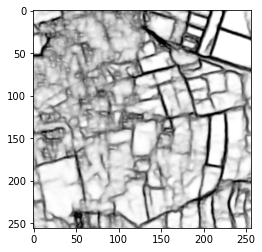

In [6]:
plt.imshow(img, cmap='Greys_r')
plt.show()

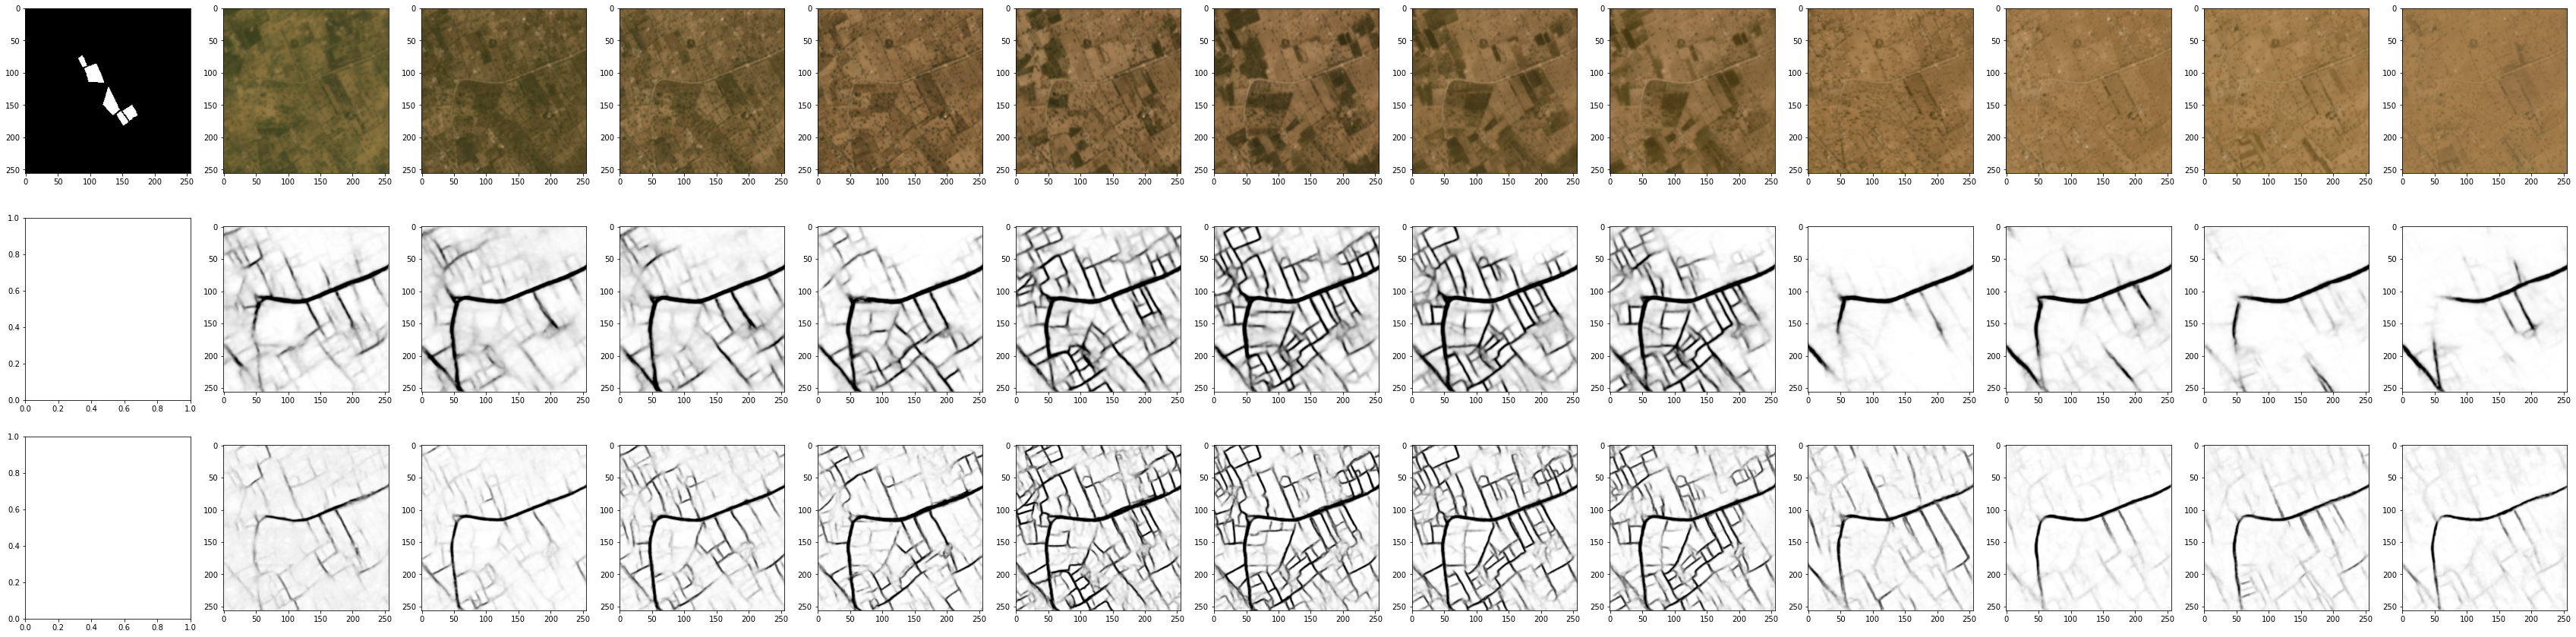

In [125]:
# directly applying France original resolution vs. 2x+3x downsampled
image_id = '0013'
months = ['2020_{}'.format(str(x).zfill(2)) for x in range(8, 13)] + \
         ['2021_{}'.format(str(x).zfill(2)) for x in range(1, 8)]
fig, ax = plt.subplots(3, 13, figsize=(65,15))
label = imageio.imread('../data/planet/india/GeneralBlockchain/extent_labels_test/{}.png'.format(image_id))
ax[0,0].imshow(label, cmap='Greys_r')
for m, month in enumerate(months):
    im = imageio.imread('../data/planet/india/GeneralBlockchain/monthly_mosaics_renamed_clipped_merged_test/{}/{}_{}.tif'.format(month, image_id, month))
    img1 = np.load('../results/india/GeneralBlockchain/fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_1x-downsampled_allfields_n6759/{}/extent_predictions/{}_{}.npy'.format(month, image_id, month))
    img2 = np.load('../results/india/GeneralBlockchain/fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759/{}/extent_predictions/{}_{}.npy'.format(month, image_id, month))

    ax[0,m+1].imshow(im, cmap='Greys_r')
    ax[1,m+1].imshow(img1, cmap='Greys_r')
    ax[2,m+1].imshow(img2, cmap='Greys_r')
plt.show()

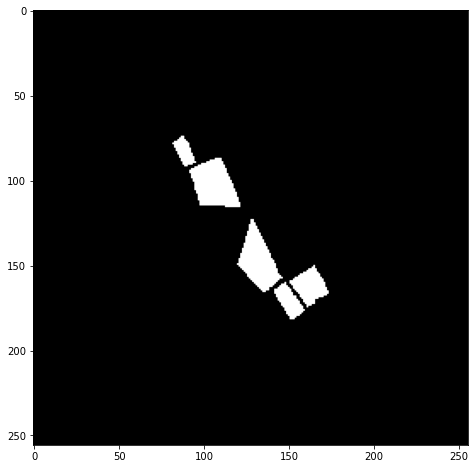

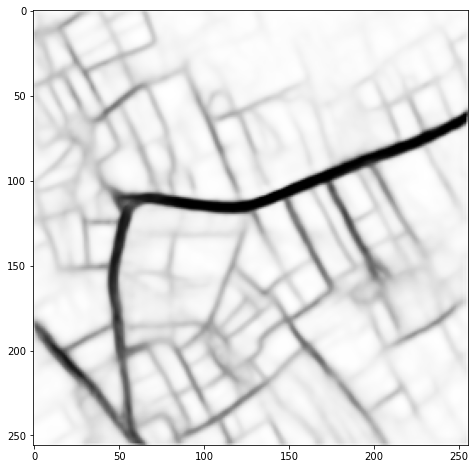

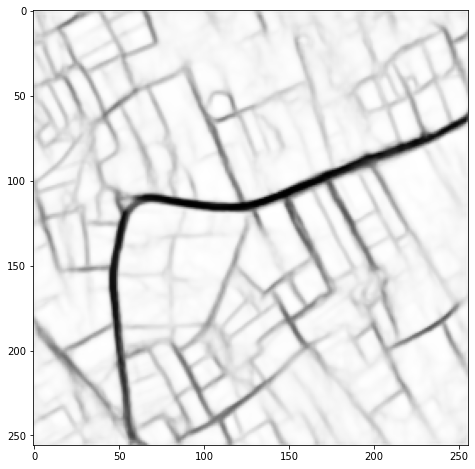

In [126]:
# directly applying France original resolution vs. 2x+3x downsampled
image_id = '0013'
img1 = np.load('../results/india/GeneralBlockchain/fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_1x-downsampled_allfields_n6759/consensus/extent_predictions/{}.npy'.format(image_id))
img2 = np.load('../results/india/GeneralBlockchain/fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759/consensus/extent_predictions/{}.npy'.format(image_id))
label = imageio.imread('../data/planet/india/GeneralBlockchain/extent_labels_test/{}.png'.format(image_id))

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.imshow(label, cmap='Greys_r')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.imshow(img1, cmap='Greys_r')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.imshow(img2, cmap='Greys_r')
plt.show()

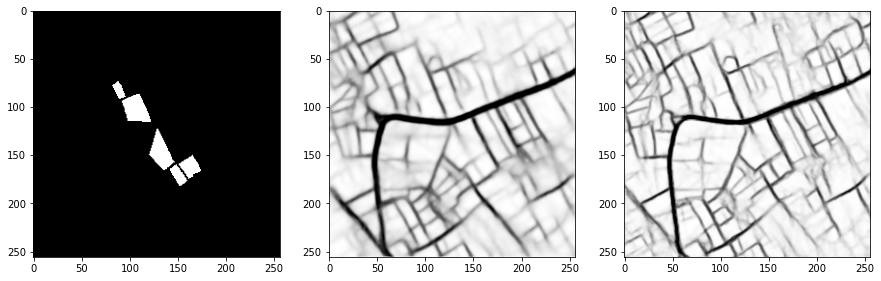

In [134]:
# directly applying France original resolution vs. 2x+3x downsampled
image_id = '0013'
img1 = np.load('../results/india/GeneralBlockchain/fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_1x-downsampled_allfields_n6759/consensus_OctDecFeb/extent_predictions/{}.npy'.format(image_id))
img2 = np.load('../results/india/GeneralBlockchain/fractal-resunet_3month-separate_nfilter-32_depth-6_bs-8_lr-0.001_2x-3x-downsampled_allfields_n6759/consensus_OctDecFeb/extent_predictions/{}.npy'.format(image_id))
label = imageio.imread('../data/planet/india/GeneralBlockchain/extent_labels_test/{}.png'.format(image_id))

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(label, cmap='Greys_r')
ax[1].imshow(img1, cmap='Greys_r')
ax[2].imshow(img2, cmap='Greys_r')
plt.show()